In [111]:
%reset -f
import pandas as pd
import numpy as np

original_prices = pd.read_csv("HistoricalPrices.csv", sep=r'\s*,\s*', engine = 'python')

prices = original_prices.copy(deep = True)

prices['Date'] = prices['Date'].apply(lambda x: int(''.join(x[0:5].split('/'))))

prices

,Date,Open,High,Low,Close
0,409,1.1913,1.1922,1.1867,1.1902
1,408,1.1868,1.1927,1.1861,1.1918
2,407,1.1872,1.1916,1.1861,1.1872
3,406,1.1814,1.1880,1.1796,1.1873
4,405,1.1764,1.1822,1.1738,1.1812
...,...,...,...,...,...
3938,307,1.2017,1.2017,1.1888,1.1888
3939,306,1.2043,1.2043,1.2017,1.2017
3940,303,1.2040,1.2043,1.2040,1.2043
3941,302,1.1923,1.2040,1.1923,1.2040


In [112]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans

# Standardize the columns
prices_standardized=(prices-prices.min())/(prices.max()-prices.min())

prices_standardized

,Date,Open,High,Low,Close
0,0.272566,0.271997,0.269824,0.273919,0.270164
1,0.271681,0.263966,0.270721,0.272842,0.273019
2,0.270796,0.264680,0.268748,0.272842,0.264811
3,0.269912,0.254328,0.262289,0.261174,0.264989
4,0.269027,0.245404,0.251884,0.250763,0.254104
...,...,...,...,...,...
3938,0.182301,0.290559,0.286868,0.277688,0.267666
3939,0.181416,0.295199,0.291532,0.300844,0.290685
3940,0.178761,0.294664,0.291532,0.304972,0.295325
3941,0.177876,0.273782,0.290994,0.283971,0.294789


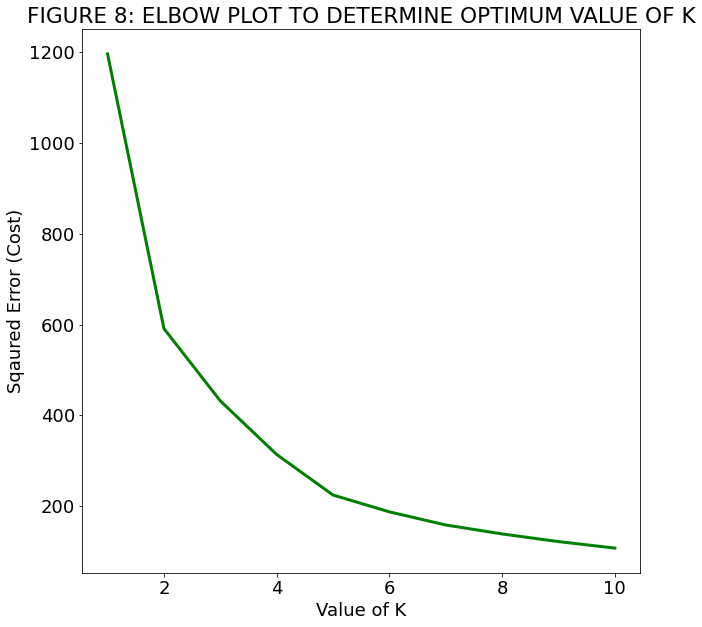

In [113]:
import matplotlib.pyplot as plt
# Finding the value of K
cost =[] 
for i in range(1, 11): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(prices_standardized) # USE STANDARDIZED DATA HERE
      
    # calculates squared error for the clustered points 
    cost.append(KM.inertia_)      
  
# plot the cost against K values 
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.title("FIGURE 8: ELBOW PLOT TO DETERMINE OPTIMUM VALUE OF K")
plt.show()

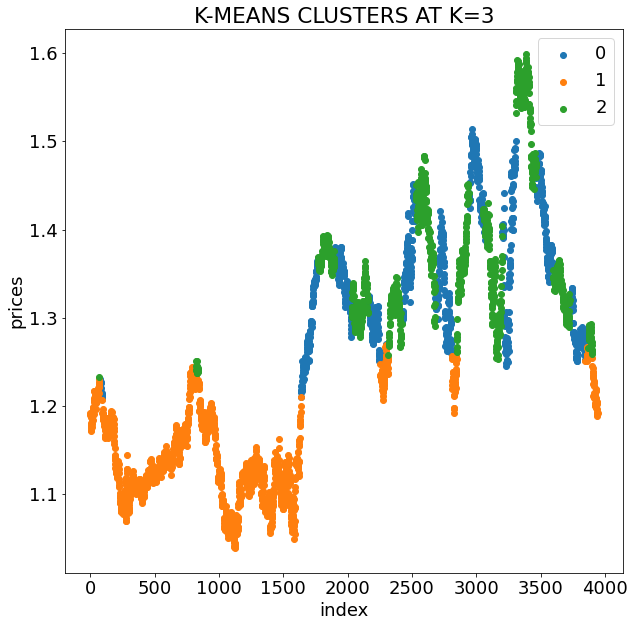

In [114]:
#####################################################################################
# BEGIN K-MEANS
#####################################################################################
num_clusters = 3
kmeans = KMeans(n_clusters= num_clusters)
label = kmeans.fit_predict(prices_standardized) 
u_labels = np.unique(label)

idx = np.array(list(prices.index))
close_price = np.array(list(prices['Close']))

fig = plt.figure()
for i in u_labels:
    plt.scatter(idx[label == i] , close_price[label == i] , label = i) 
plt.legend()
plt.xlabel("index")
plt.ylabel("prices")
plt.title("K-MEANS CLUSTERS AT K={}".format(num_clusters))
plt.show()
